<a href="https://colab.research.google.com/github/KaanErdogdu/Bootcamp_Bolum_1/blob/master/4_8_Odev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
pd.options.display.float_format="{:.2f}".format

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
statesData = pd.read_csv("states_all.csv")


statesData.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,nan,2678885.00,304177.00,1659028.00,715680.00,2653798.00,1481703.00,735036.00,nan,174053.00,8224.00,55460.00,57948.00,58025.00,41167.00,nan,nan,731634.00,208.00,252.00,207.00,nan
1,1992_ALASKA,ALASKA,1992,nan,1049591.00,106780.00,720711.00,222100.00,972488.00,498362.00,350902.00,nan,37451.00,2371.00,10152.00,9748.00,8789.00,6714.00,nan,nan,122487.00,nan,nan,nan,nan
2,1992_ARIZONA,ARIZONA,1992,nan,3258079.00,297888.00,1369815.00,1590376.00,3401580.00,1435908.00,1007732.00,nan,609114.00,2544.00,53497.00,55433.00,49081.00,37410.00,nan,nan,673477.00,215.00,265.00,209.00,nan
3,1992_ARKANSAS,ARKANSAS,1992,nan,1711959.00,178571.00,958785.00,574603.00,1743022.00,964323.00,483488.00,nan,145212.00,808.00,33511.00,34632.00,36011.00,27651.00,nan,nan,441490.00,210.00,256.00,211.00,nan
4,1992_CALIFORNIA,CALIFORNIA,1992,nan,26260025.00,2072470.00,16546514.00,7641041.00,27138832.00,14358922.00,8520926.00,nan,2044688.00,59067.00,431763.00,418418.00,363296.00,270675.00,nan,nan,5254844.00,208.00,261.00,202.00,nan


In [0]:
statesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

In [0]:
statesData.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.00,1224.00,1275.00,1275.00,1275.00,1275.00,1275.00,1275.00,1275.00,1224.00,1275.00,1542.00,1632.00,1632.00,1632.00,1632.00,1020.00,1071.00,1632.00,565.00,602.00,650.00,562.00
mean,2002.08,917541.57,9102044.93,767779.86,4223742.90,4110522.16,9206242.12,4768010.48,2682586.52,429950.93,903467.45,17840.96,68810.96,69166.51,68106.54,58420.87,577954.72,282069.08,913969.49,236.33,278.28,218.81,263.56
std,9.57,1066514.20,11759620.23,1146991.51,5549734.82,5489561.97,11992791.01,6300569.34,3357214.50,534789.31,1329473.47,30016.60,80671.03,79957.99,77965.85,67438.53,675783.66,330709.79,1055892.95,9.29,10.34,7.68,6.61
min,1986.00,43866.00,465650.00,31020.00,0.00,22093.00,481665.00,265549.00,139963.00,11541.00,12708.00,96.00,5122.00,4577.00,3371.00,2572.00,37698.00,13530.00,68449.00,192.00,231.00,179.00,236.00
25%,1994.00,264514.50,2189503.50,189957.50,1165776.00,715121.00,2170404.00,1171336.50,638076.00,103449.25,181507.00,2199.75,19029.75,18971.50,19594.25,16076.50,164925.00,80608.00,248083.25,232.00,272.00,215.00,260.00
50%,2002.00,649933.50,5085826.00,403548.00,2537754.00,2058996.00,5242672.00,2658253.00,1525471.00,271704.00,510428.00,8258.00,48122.00,49087.00,47880.00,39408.00,405111.50,186919.00,645805.00,238.00,280.50,220.00,265.00
75%,2010.00,1010532.00,10845163.00,827932.00,5055547.50,4755293.00,10744201.50,5561959.00,3222924.50,517222.25,966148.00,22691.75,78864.25,78504.25,78976.00,69397.25,643975.25,322328.00,1043420.50,242.00,286.00,224.00,268.00
max,2019.00,6307022.00,89217262.00,9990221.00,50904567.00,36105265.00,85320133.00,43964520.00,26058021.00,3995951.00,10223657.00,256222.00,535379.00,493415.00,500143.00,498403.00,3929869.00,2013687.00,6441557.00,253.00,301.00,237.00,280.00


In [0]:
statesData.isnull().sum()*100/statesData.shape[0]

PRIMARY_KEY                     0.00
STATE                           0.00
YEAR                            0.00
ENROLL                         28.63
TOTAL_REVENUE                  25.66
FEDERAL_REVENUE                25.66
STATE_REVENUE                  25.66
LOCAL_REVENUE                  25.66
TOTAL_EXPENDITURE              25.66
INSTRUCTION_EXPENDITURE        25.66
SUPPORT_SERVICES_EXPENDITURE   25.66
OTHER_EXPENDITURE              28.63
CAPITAL_OUTLAY_EXPENDITURE     25.66
GRADES_PK_G                    10.09
GRADES_KG_G                     4.84
GRADES_4_G                      4.84
GRADES_8_G                      4.84
GRADES_12_G                     4.84
GRADES_1_8_G                   40.52
GRADES_9_12_G                  37.55
GRADES_ALL_G                    4.84
AVG_MATH_4_SCORE               67.06
AVG_MATH_8_SCORE               64.90
AVG_READING_4_SCORE            62.10
AVG_READING_8_SCORE            67.23
dtype: float64

In [0]:
statesData.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [0]:
columns = statesData.columns
columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [0]:
fill_List = ['ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G']

for coll in fill_List:
  statesData.loc[:,coll].fillna(statesData.loc[:,coll].mean(), inplace = True)

In [0]:
statesData.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                             0
TOTAL_REVENUE                      0
FEDERAL_REVENUE                    0
STATE_REVENUE                      0
LOCAL_REVENUE                      0
TOTAL_EXPENDITURE                  0
INSTRUCTION_EXPENDITURE            0
SUPPORT_SERVICES_EXPENDITURE       0
OTHER_EXPENDITURE                  0
CAPITAL_OUTLAY_EXPENDITURE         0
GRADES_PK_G                        0
GRADES_KG_G                        0
GRADES_4_G                         0
GRADES_8_G                         0
GRADES_12_G                        0
GRADES_1_8_G                       0
GRADES_9_12_G                      0
GRADES_ALL_G                       0
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [0]:
statesData["WEIGHTED_MEAN_SCORE"]=(statesData["GRADES_4_G"]*statesData["AVG_MATH_4_SCORE"]+
                            statesData["GRADES_4_G"]*statesData["AVG_READING_4_SCORE"]+
                            statesData["GRADES_8_G"]*statesData["AVG_MATH_8_SCORE"]+
                            statesData["GRADES_8_G"]*statesData["AVG_READING_8_SCORE"])/(
                            2*(statesData["GRADES_4_G"]+statesData["GRADES_8_G"]))

In [0]:
statesData.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,WEIGHTED_MEAN_SCORE
0,1992_ALABAMA,ALABAMA,1992,917541.57,2678885.00,304177.00,1659028.00,715680.00,2653798.00,1481703.00,735036.00,429950.93,174053.00,8224.00,55460.00,57948.00,58025.00,41167.00,577954.72,282069.08,731634.00,208.00,252.00,207.00,nan,nan
1,1992_ALASKA,ALASKA,1992,917541.57,1049591.00,106780.00,720711.00,222100.00,972488.00,498362.00,350902.00,429950.93,37451.00,2371.00,10152.00,9748.00,8789.00,6714.00,577954.72,282069.08,122487.00,nan,nan,nan,nan,nan
2,1992_ARIZONA,ARIZONA,1992,917541.57,3258079.00,297888.00,1369815.00,1590376.00,3401580.00,1435908.00,1007732.00,429950.93,609114.00,2544.00,53497.00,55433.00,49081.00,37410.00,577954.72,282069.08,673477.00,215.00,265.00,209.00,nan,nan
3,1992_ARKANSAS,ARKANSAS,1992,917541.57,1711959.00,178571.00,958785.00,574603.00,1743022.00,964323.00,483488.00,429950.93,145212.00,808.00,33511.00,34632.00,36011.00,27651.00,577954.72,282069.08,441490.00,210.00,256.00,211.00,nan,nan
4,1992_CALIFORNIA,CALIFORNIA,1992,917541.57,26260025.00,2072470.00,16546514.00,7641041.00,27138832.00,14358922.00,8520926.00,429950.93,2044688.00,59067.00,431763.00,418418.00,363296.00,270675.00,577954.72,282069.08,5254844.00,208.00,261.00,202.00,nan,nan


In [0]:
statesData_exp = statesData.iloc[:,8:]
statesData_korelasyon = statesData_exp.corr()
statesData_korelasyon

,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,WEIGHTED_MEAN_SCORE
TOTAL_EXPENDITURE,1.00,0.99,0.99,0.94,0.93,0.68,0.81,0.82,0.83,0.86,0.88,0.88,0.83,0.12,0.08,0.06,-0.02,0.01
INSTRUCTION_EXPENDITURE,0.99,1.00,0.98,0.90,0.90,0.64,0.78,0.79,0.80,0.83,0.85,0.84,0.80,0.12,0.08,0.07,-0.00,0.03
SUPPORT_SERVICES_EXPENDITURE,0.99,0.98,1.00,0.95,0.92,0.67,0.81,0.82,0.84,0.87,0.88,0.88,0.83,0.13,0.09,0.06,-0.01,0.02
OTHER_EXPENDITURE,0.94,0.90,0.95,1.00,0.92,0.69,0.84,0.85,0.86,0.89,0.91,0.90,0.86,0.04,0.01,-0.02,-0.09,-0.05
CAPITAL_OUTLAY_EXPENDITURE,0.93,0.90,0.92,0.92,1.00,0.73,0.81,0.82,0.84,0.84,0.91,0.89,0.83,0.06,0.03,-0.02,-0.11,-0.07
GRADES_PK_G,0.68,0.64,0.67,0.69,0.73,1.00,0.73,0.75,0.75,0.72,0.70,0.70,0.75,0.10,0.09,-0.00,-0.05,-0.00
GRADES_KG_G,0.81,0.78,0.81,0.84,0.81,0.73,1.00,1.00,0.99,0.98,0.82,0.84,1.00,-0.03,-0.05,-0.10,-0.12,-0.07
GRADES_4_G,0.82,0.79,0.82,0.85,0.82,0.75,1.00,1.00,1.00,0.98,0.83,0.85,1.00,-0.03,-0.05,-0.09,-0.11,-0.06
GRADES_8_G,0.83,0.80,0.84,0.86,0.84,0.75,0.99,1.00,1.00,0.98,0.85,0.87,1.00,-0.01,-0.03,-0.08,-0.10,-0.06
GRADES_12_G,0.86,0.83,0.87,0.89,0.84,0.72,0.98,0.98,0.98,1.00,0.85,0.89,0.98,0.03,0.02,-0.03,-0.07,-0.03


Text(0.5, 1.0, 'Korelasyon Matrisi (statesData_korelasyon)')

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


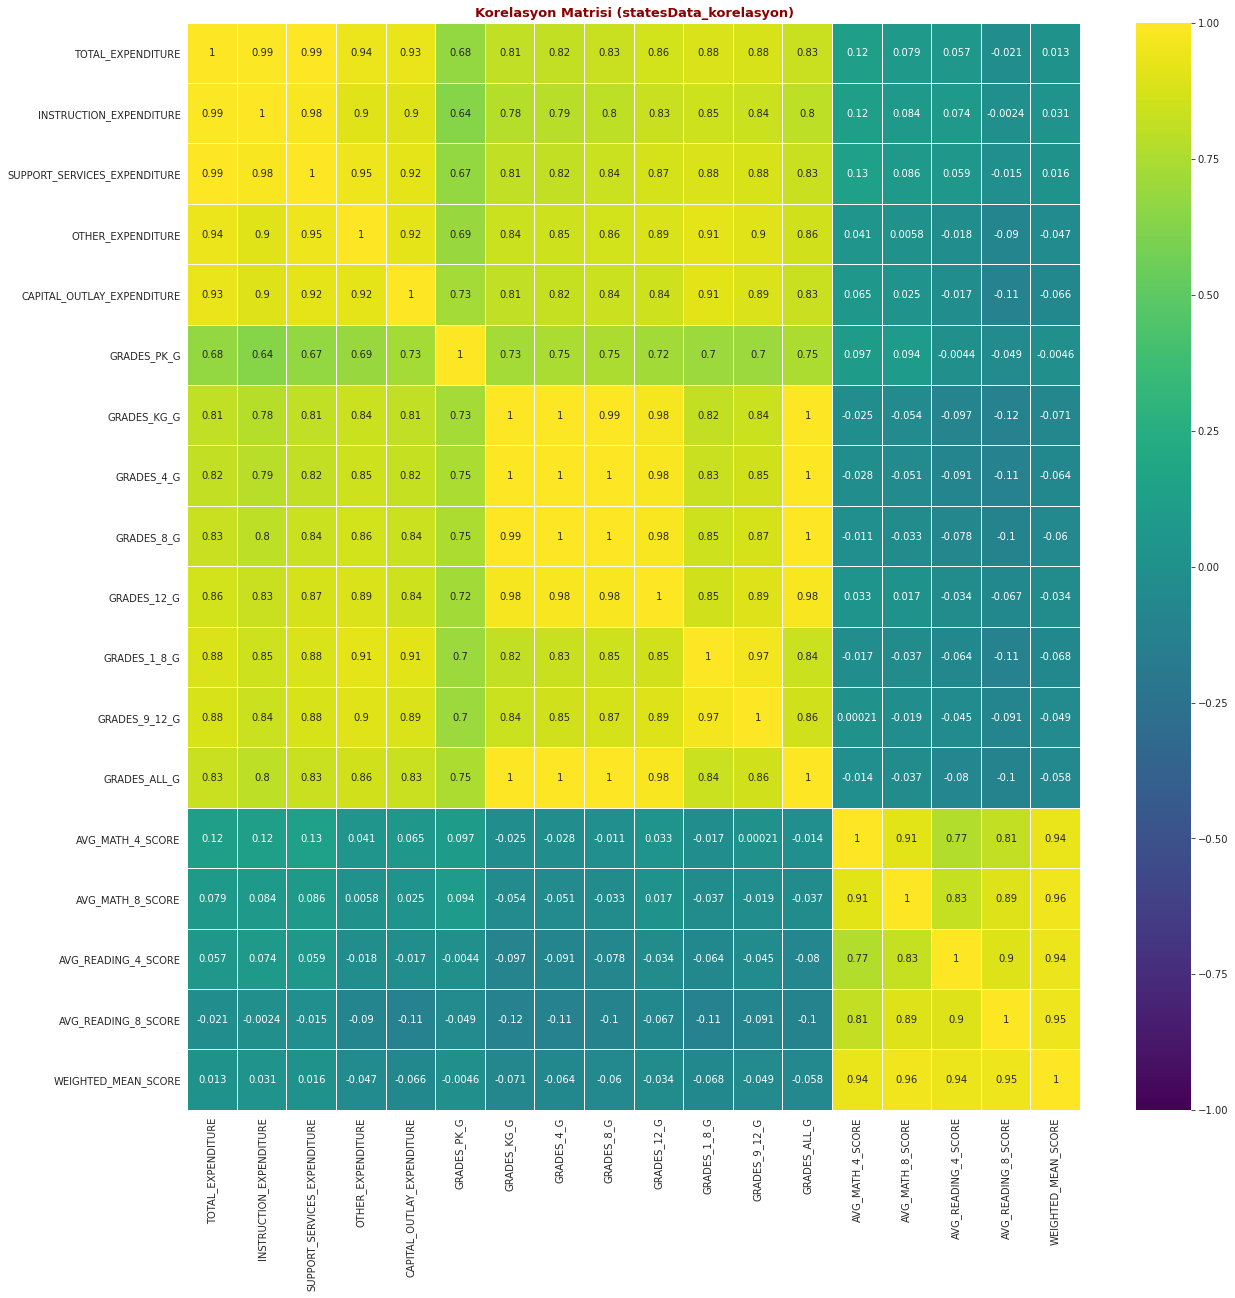

In [0]:
plt.figure(figsize=(20,20))
sns.heatmap(statesData_korelasyon, annot=True, linewidths=.1, vmin=-1, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (statesData_korelasyon)", fontdict = baslik_font)

In [0]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)

t = sns.regplot('OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE' statesData_korelasyon, x_jitter=.49, y_jitter=.49, fit_reg=False)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Ham Veri', fontdict = baslik_font)

sns.regplot()

SyntaxError: ignored

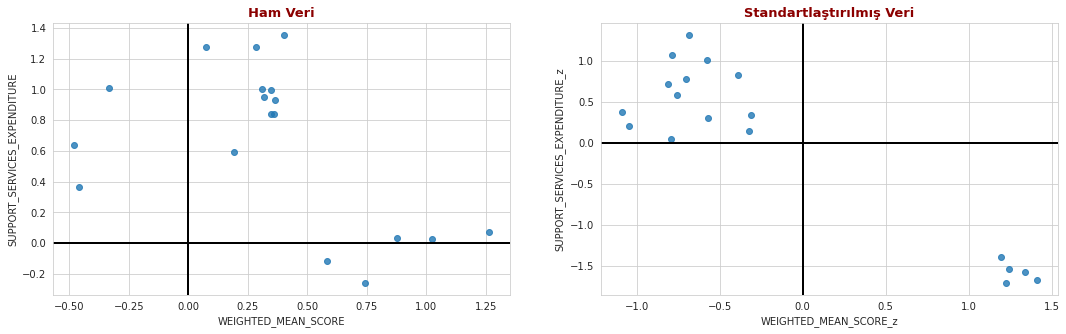

In [0]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)

t = sns.regplot('WEIGHTED_MEAN_SCORE', 'SUPPORT_SERVICES_EXPENDITURE', statesData_korelasyon, x_jitter=.49, y_jitter=.49, fit_reg=False)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Ham Veri', fontdict = baslik_font)

plt.subplot(1,2,2)

fifa_st_df = pd.DataFrame()
fifa_st_df['WEIGHTED_MEAN_SCORE_z'] = (statesData_korelasyon['WEIGHTED_MEAN_SCORE'] - statesData_korelasyon['WEIGHTED_MEAN_SCORE'].mean()) / statesData_korelasyon['WEIGHTED_MEAN_SCORE'].std()
fifa_st_df['SUPPORT_SERVICES_EXPENDITURE_z'] = (statesData_korelasyon['SUPPORT_SERVICES_EXPENDITURE'] - statesData_korelasyon['SUPPORT_SERVICES_EXPENDITURE'].mean()) / statesData_korelasyon['SUPPORT_SERVICES_EXPENDITURE'].std()

t = sns.regplot('WEIGHTED_MEAN_SCORE_z','SUPPORT_SERVICES_EXPENDITURE_z',fifa_st_df, x_jitter=.49, y_jitter=.49, fit_reg=False )
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standartlaştırılmış Veri', fontdict = baslik_font)
plt.show()

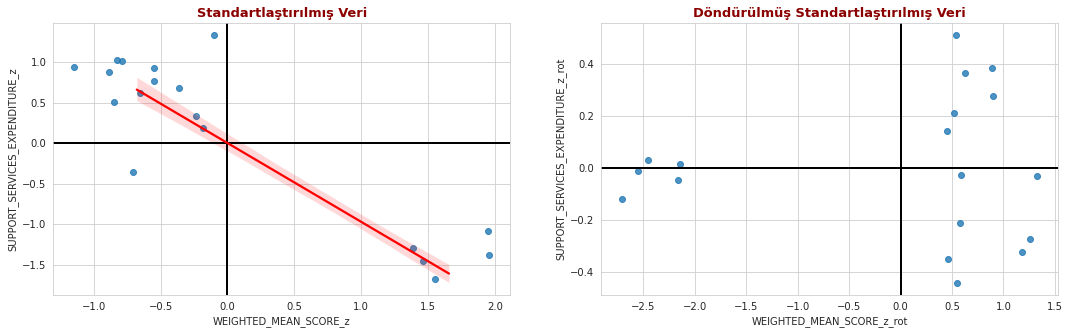

In [0]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)

t = sns.regplot('WEIGHTED_MEAN_SCORE_z', 'SUPPORT_SERVICES_EXPENDITURE_z', fifa_st_df, x_jitter=.49, y_jitter=.49, fit_reg=False)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standartlaştırılmış Veri', fontdict = baslik_font)

sns.regplot('WEIGHTED_MEAN_SCORE_z', 'SUPPORT_SERVICES_EXPENDITURE_z', fifa_st_df, scatter=False, color="red")

plt.subplot(1,2,2)

fifa_st_df['WEIGHTED_MEAN_SCORE_z_rot'] = math.cos(40) * fifa_st_df['WEIGHTED_MEAN_SCORE_z'] - math.sin(40) * fifa_st_df['WEIGHTED_MEAN_SCORE_z']
fifa_st_df['SUPPORT_SERVICES_EXPENDITURE_z_rot'] = math.sin(40) * fifa_st_df['SUPPORT_SERVICES_EXPENDITURE_z'] + math.cos(40) * fifa_st_df['SUPPORT_SERVICES_EXPENDITURE_z']

t = sns.regplot('WEIGHTED_MEAN_SCORE_z_rot','SUPPORT_SERVICES_EXPENDITURE_z_rot', fifa_st_df, x_jitter=.49, y_jitter=.49,fit_reg=False )
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Döndürülmüş Standartlaştırılmış Veri', fontdict = baslik_font)
plt.show()

Text(0.5, 1.0, 'Standartlaştırılmış Veri')

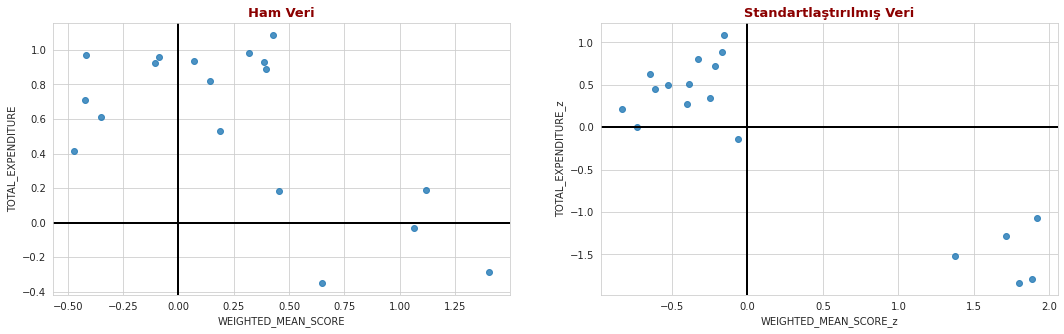

In [0]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)

t = sns.regplot('WEIGHTED_MEAN_SCORE', 'TOTAL_EXPENDITURE', statesData_korelasyon, x_jitter=.49, y_jitter=.49, fit_reg=False)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Ham Veri', fontdict = baslik_font)

plt.subplot(1,2,2)

fifa_st_df = pd.DataFrame()
fifa_st_df['WEIGHTED_MEAN_SCORE_z'] = (statesData_korelasyon['WEIGHTED_MEAN_SCORE'] - statesData_korelasyon['WEIGHTED_MEAN_SCORE'].mean()) / statesData_korelasyon['WEIGHTED_MEAN_SCORE'].std()
fifa_st_df['TOTAL_EXPENDITURE_z'] = (statesData_korelasyon['TOTAL_EXPENDITURE'] - statesData_korelasyon['TOTAL_EXPENDITURE'].mean()) / statesData_korelasyon['TOTAL_EXPENDITURE'].std()

t = sns.regplot('WEIGHTED_MEAN_SCORE_z','TOTAL_EXPENDITURE_z',fifa_st_df, x_jitter=.49, y_jitter=.49, fit_reg=False )
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standartlaştırılmış Veri', fontdict = baslik_font)

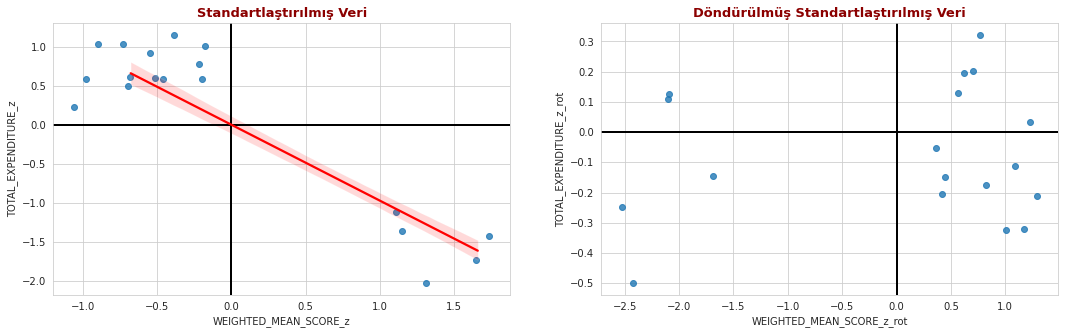

In [0]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)

t = sns.regplot('WEIGHTED_MEAN_SCORE_z', 'TOTAL_EXPENDITURE_z', fifa_st_df, x_jitter=.49, y_jitter=.49, fit_reg=False)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standartlaştırılmış Veri', fontdict = baslik_font)

sns.regplot('WEIGHTED_MEAN_SCORE_z', 'TOTAL_EXPENDITURE_z', fifa_st_df, scatter=False, color="red")

plt.subplot(1,2,2)

fifa_st_df['WEIGHTED_MEAN_SCORE_z_rot'] = math.cos(40) * fifa_st_df['WEIGHTED_MEAN_SCORE_z'] - math.sin(40) * fifa_st_df['WEIGHTED_MEAN_SCORE_z']
fifa_st_df['TOTAL_EXPENDITURE_z_rot'] = math.sin(40) * fifa_st_df['TOTAL_EXPENDITURE_z'] + math.cos(40) * fifa_st_df['TOTAL_EXPENDITURE_z']

t = sns.regplot('WEIGHTED_MEAN_SCORE_z_rot','TOTAL_EXPENDITURE_z_rot', fifa_st_df, x_jitter=.49, y_jitter=.49,fit_reg=False )
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Döndürülmüş Standartlaştırılmış Veri', fontdict = baslik_font)
plt.show()

Text(0.5, 1.0, 'Standartlaştırılmış Veri')

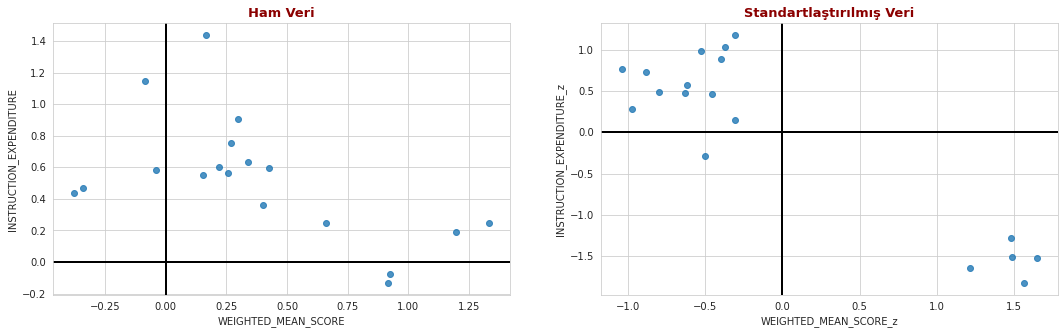

In [0]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)

t = sns.regplot('WEIGHTED_MEAN_SCORE', 'INSTRUCTION_EXPENDITURE', statesData_korelasyon, x_jitter=.49, y_jitter=.49, fit_reg=False)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Ham Veri', fontdict = baslik_font)

plt.subplot(1,2,2)

fifa_st_df = pd.DataFrame()
fifa_st_df['WEIGHTED_MEAN_SCORE_z'] = (statesData_korelasyon['WEIGHTED_MEAN_SCORE'] - statesData_korelasyon['WEIGHTED_MEAN_SCORE'].mean()) / statesData_korelasyon['WEIGHTED_MEAN_SCORE'].std()
fifa_st_df['INSTRUCTION_EXPENDITURE_z'] = (statesData_korelasyon['INSTRUCTION_EXPENDITURE'] - statesData_korelasyon['INSTRUCTION_EXPENDITURE'].mean()) / statesData_korelasyon['INSTRUCTION_EXPENDITURE'].std()

t = sns.regplot('WEIGHTED_MEAN_SCORE_z','INSTRUCTION_EXPENDITURE_z',fifa_st_df, x_jitter=.49, y_jitter=.49, fit_reg=False )
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standartlaştırılmış Veri', fontdict = baslik_font)

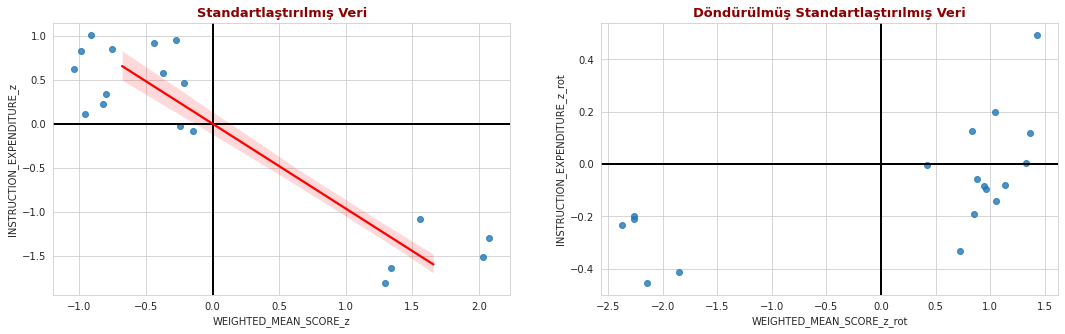

In [0]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)

t = sns.regplot('WEIGHTED_MEAN_SCORE_z', 'INSTRUCTION_EXPENDITURE_z', fifa_st_df, x_jitter=.49, y_jitter=.49, fit_reg=False)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standartlaştırılmış Veri', fontdict = baslik_font)

sns.regplot('WEIGHTED_MEAN_SCORE_z', 'INSTRUCTION_EXPENDITURE_z', fifa_st_df, scatter=False, color="red")

plt.subplot(1,2,2)

fifa_st_df['WEIGHTED_MEAN_SCORE_z_rot'] = math.cos(40) * fifa_st_df['WEIGHTED_MEAN_SCORE_z'] - math.sin(40) * fifa_st_df['WEIGHTED_MEAN_SCORE_z']
fifa_st_df['INSTRUCTION_EXPENDITURE_z_rot'] = math.sin(40) * fifa_st_df['INSTRUCTION_EXPENDITURE_z'] + math.cos(40) * fifa_st_df['INSTRUCTION_EXPENDITURE_z']

t = sns.regplot('WEIGHTED_MEAN_SCORE_z_rot','INSTRUCTION_EXPENDITURE_z_rot', fifa_st_df, x_jitter=.49, y_jitter=.49,fit_reg=False )
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Döndürülmüş Standartlaştırılmış Veri', fontdict = baslik_font)
plt.show()

Text(0.5, 1.0, 'Standartlaştırılmış Veri')

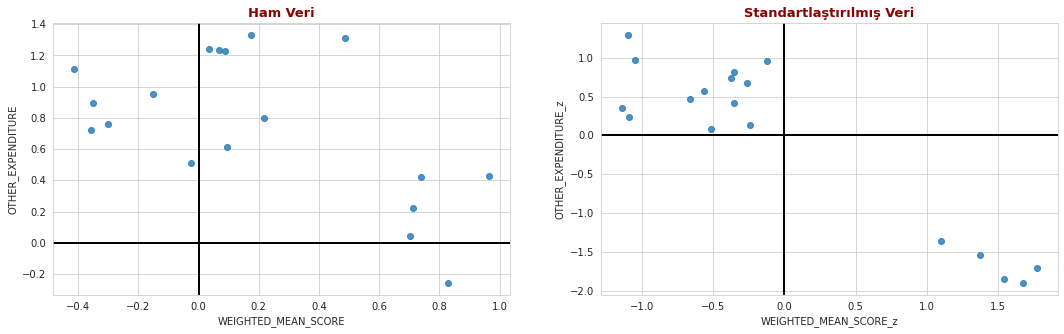

In [0]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)

t = sns.regplot('WEIGHTED_MEAN_SCORE', 'OTHER_EXPENDITURE', statesData_korelasyon, x_jitter=.49, y_jitter=.49, fit_reg=False)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Ham Veri', fontdict = baslik_font)

plt.subplot(1,2,2)

fifa_st_df = pd.DataFrame()
fifa_st_df['WEIGHTED_MEAN_SCORE_z'] = (statesData_korelasyon['WEIGHTED_MEAN_SCORE'] - statesData_korelasyon['WEIGHTED_MEAN_SCORE'].mean()) / statesData_korelasyon['WEIGHTED_MEAN_SCORE'].std()
fifa_st_df['OTHER_EXPENDITURE_z'] = (statesData_korelasyon['OTHER_EXPENDITURE'] - statesData_korelasyon['OTHER_EXPENDITURE'].mean()) / statesData_korelasyon['OTHER_EXPENDITURE'].std()

t = sns.regplot('WEIGHTED_MEAN_SCORE_z','OTHER_EXPENDITURE_z',fifa_st_df, x_jitter=.49, y_jitter=.49, fit_reg=False )
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standartlaştırılmış Veri', fontdict = baslik_font)

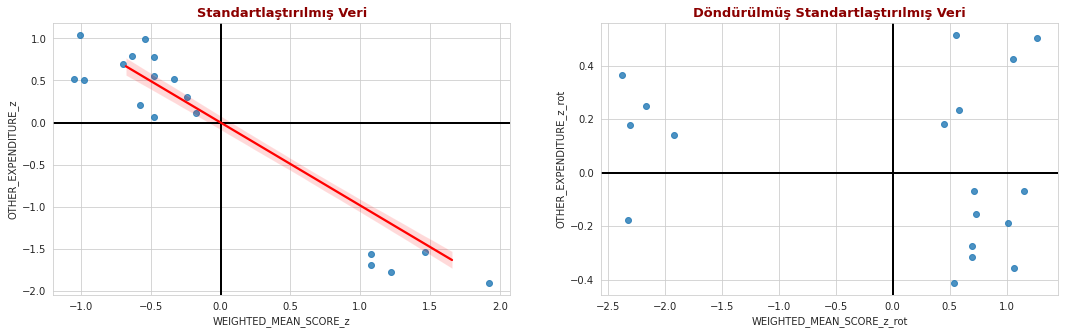

In [0]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)

t = sns.regplot('WEIGHTED_MEAN_SCORE_z', 'OTHER_EXPENDITURE_z', fifa_st_df, x_jitter=.49, y_jitter=.49, fit_reg=False)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standartlaştırılmış Veri', fontdict = baslik_font)

sns.regplot('WEIGHTED_MEAN_SCORE_z', 'OTHER_EXPENDITURE_z', fifa_st_df, scatter=False, color="red")

plt.subplot(1,2,2)

fifa_st_df['WEIGHTED_MEAN_SCORE_z_rot'] = math.cos(40) * fifa_st_df['WEIGHTED_MEAN_SCORE_z'] - math.sin(40) * fifa_st_df['WEIGHTED_MEAN_SCORE_z']
fifa_st_df['OTHER_EXPENDITURE_z_rot'] = math.sin(40) * fifa_st_df['OTHER_EXPENDITURE_z'] + math.cos(40) * fifa_st_df['OTHER_EXPENDITURE_z']

t = sns.regplot('WEIGHTED_MEAN_SCORE_z_rot','OTHER_EXPENDITURE_z_rot', fifa_st_df, x_jitter=.49, y_jitter=.49,fit_reg=False )
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Döndürülmüş Standartlaştırılmış Veri', fontdict = baslik_font)
plt.show()

Text(0.5, 1.0, 'Standartlaştırılmış Veri')

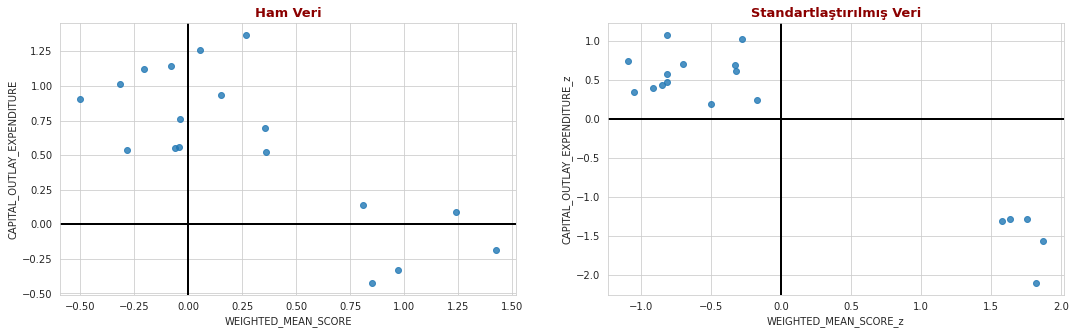

In [0]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)

t = sns.regplot('WEIGHTED_MEAN_SCORE', 'CAPITAL_OUTLAY_EXPENDITURE', statesData_korelasyon, x_jitter=.49, y_jitter=.49, fit_reg=False)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Ham Veri', fontdict = baslik_font)

plt.subplot(1,2,2)

fifa_st_df = pd.DataFrame()
fifa_st_df['WEIGHTED_MEAN_SCORE_z'] = (statesData_korelasyon['WEIGHTED_MEAN_SCORE'] - statesData_korelasyon['WEIGHTED_MEAN_SCORE'].mean()) / statesData_korelasyon['WEIGHTED_MEAN_SCORE'].std()
fifa_st_df['CAPITAL_OUTLAY_EXPENDITURE_z'] = (statesData_korelasyon['CAPITAL_OUTLAY_EXPENDITURE'] - statesData_korelasyon['CAPITAL_OUTLAY_EXPENDITURE'].mean()) / statesData_korelasyon['CAPITAL_OUTLAY_EXPENDITURE'].std()

t = sns.regplot('WEIGHTED_MEAN_SCORE_z','CAPITAL_OUTLAY_EXPENDITURE_z',fifa_st_df, x_jitter=.49, y_jitter=.49, fit_reg=False )
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standartlaştırılmış Veri', fontdict = baslik_font)

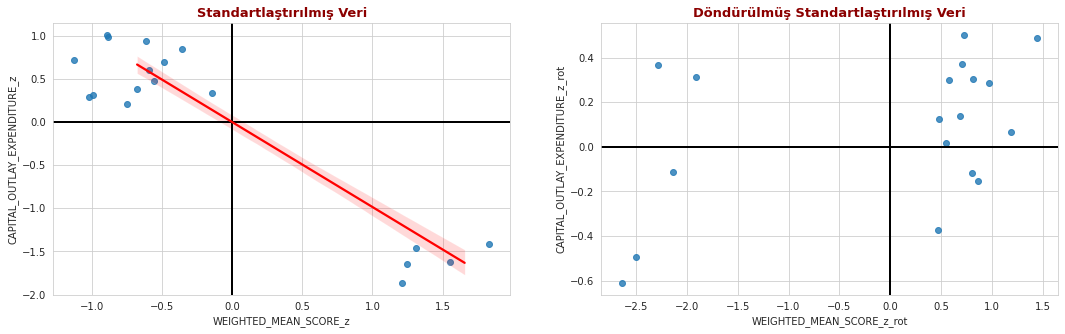

In [0]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)

t = sns.regplot('WEIGHTED_MEAN_SCORE_z', 'CAPITAL_OUTLAY_EXPENDITURE_z', fifa_st_df, x_jitter=.49, y_jitter=.49, fit_reg=False)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standartlaştırılmış Veri', fontdict = baslik_font)

sns.regplot('WEIGHTED_MEAN_SCORE_z', 'CAPITAL_OUTLAY_EXPENDITURE_z', fifa_st_df, scatter=False, color="red")

plt.subplot(1,2,2)

fifa_st_df['WEIGHTED_MEAN_SCORE_z_rot'] = math.cos(40) * fifa_st_df['WEIGHTED_MEAN_SCORE_z'] - math.sin(40) * fifa_st_df['WEIGHTED_MEAN_SCORE_z']
fifa_st_df['CAPITAL_OUTLAY_EXPENDITURE_z_rot'] = math.sin(40) * fifa_st_df['CAPITAL_OUTLAY_EXPENDITURE_z'] + math.cos(40) * fifa_st_df['CAPITAL_OUTLAY_EXPENDITURE_z']

t = sns.regplot('WEIGHTED_MEAN_SCORE_z_rot','CAPITAL_OUTLAY_EXPENDITURE_z_rot', fifa_st_df, x_jitter=.49, y_jitter=.49,fit_reg=False )
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Döndürülmüş Standartlaştırılmış Veri', fontdict = baslik_font)
plt.show()